# CNN explainability (filters and layers)

## Loading libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
import tensorflow as tf
from PIL import Image

## Importing the model

In [3]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# loading the model
model_csgo = load_model('/content/drive/MyDrive/model-csgo')
model_csgo.summary(expand_nested=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 98, 98, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 47, 47, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 44, 44, 32)       

## Conv Layer Filters Visualization

In [5]:
# storing the positions of conv layers
conv_layers_index = [1, 3, 5, 7]
# storing the layers
layer = model_csgo.layers
# storing the filters
filters, index = [], 0
for i in conv_layers_index:
  filters.append(layer[i].get_weights()[0])
  print('The layer', layer[i].name, 'has a filter shape of', filters[index].shape)
  index += 1

The layer conv2d_20 has a filter shape of (4, 4, 3, 128)
The layer conv2d_21 has a filter shape of (4, 4, 128, 64)
The layer conv2d_22 has a filter shape of (4, 4, 64, 32)
The layer conv2d_23 has a filter shape of (4, 4, 32, 16)


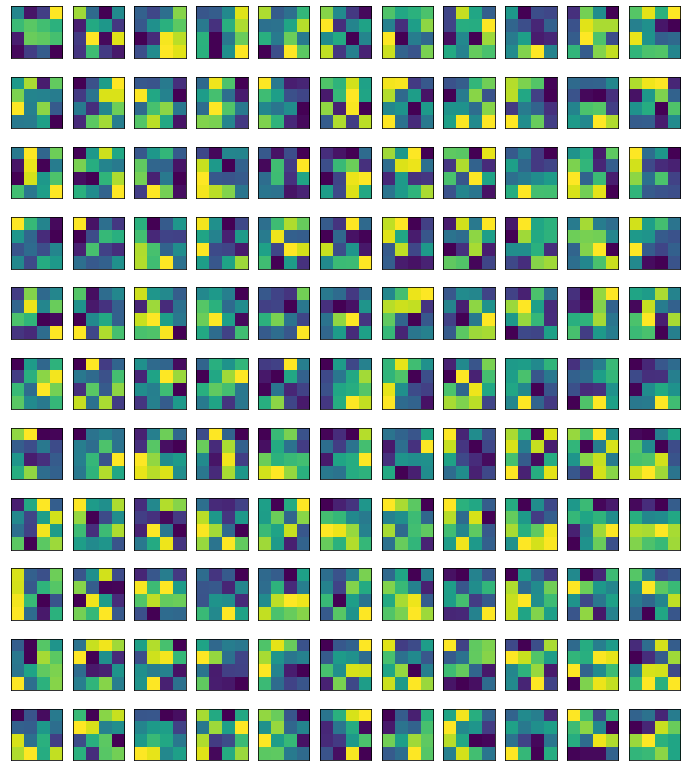

In [6]:
# displaying the filer of the specified layer
fig = plt.figure(figsize=(12, 14))
columns, rows = 11, 11
nb_filters = columns * rows # number of filters to display (121)
for i in range(1, nb_filters+1):
   f = filters[0][:, :, :, i-1]
   fig = plt.subplot(rows, columns, i)
   fig.set_xticks([]) # removing x axis
   fig.set_yticks([]) # removing y axis
   plt.imshow(f[:, :, 0], cmap='viridis')
plt.show()

### Interpretation

* Our CNN model is using all this convolutionnal filters to recognize the edges and the forms
* A kernel (a kind of matrix) is going to apply mathematical operations on the pixel values of our images
* The result of applying a kernel will be a new image that highlights specific features
* In our case we can see that we have all kind of filters that highlights various parts of our images

## Feature Maps Visualization

In [7]:
# storing the output of layers
layers_outputs = [layer.output for layer in model_csgo.layers[1:]]
# creating a new similar model
model_vis = tf.keras.models.Model(inputs = model_csgo.input, outputs = layers_outputs)

In [9]:
# loading an AK-47 image
image = load_img('/content/AK-47.jpg')
# chaging size of image
image_resized = image.resize((200, 200), box = (0, 0, 200, 200))
# converting image to array with resizing
array = img_to_array(image_resized)
array = array.reshape((1, 200, 200, 3))
# rescaling the array
array /= 255

In [10]:
# making predictions with the new model
feature_maps = model_vis.predict(array)
# storing CNN layers names
layer_names = [layer.name for layer in model_csgo.layers]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


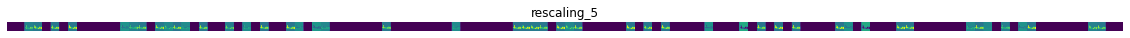

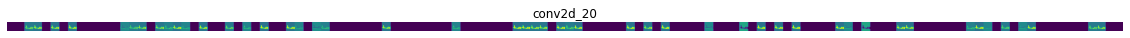

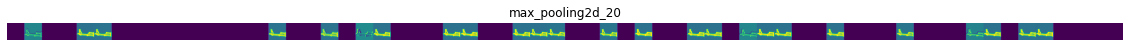

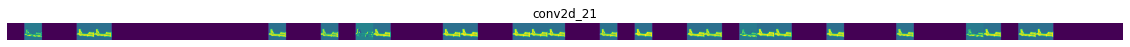

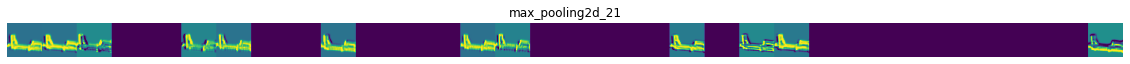

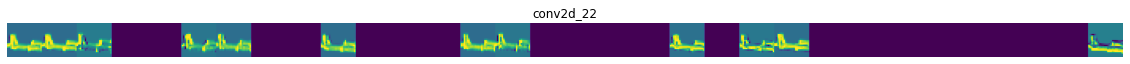

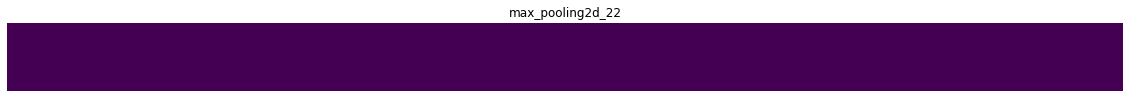

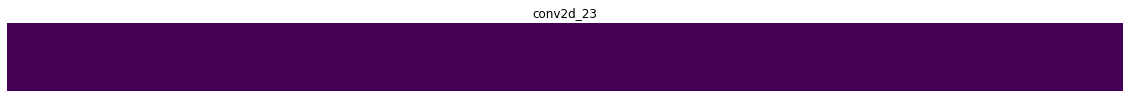

In [11]:
# displaying the feature maps we made
for layer_name, feature_map in zip(layer_names, feature_maps):
  if len(feature_map.shape) == 4:
    # initializing the display grid
    channels = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      # storing the array produced during predictions
      array = feature_map[0, :, :, i]
      # normalizing and scaling the array
      array = ((array - array.mean()) / array.std()) * 64 + 128
      # replacing out-of-range values with 0 or 255
      array = np.clip(array, 0, 255).astype('uint8')
      # filling the display grid with the array values
      display_grid[:, i * size : (i + 1) * size] = array
    scale = 20. / channels
    plt.figure(figsize = (scale * channels, scale))
    plt.title(layer_name)
    plt.axis("off")
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Interpretation

* The feature maps represents all the output of the filters used to predict an AK-47 image
* We can see all the outputs of the different layers of convulution and max pooling
* It clearly appears that the CNN model is focusing on the center of the image and precisely on the shape of the object